# Tarea 12 : Simulacion Monte Carlo
Resolver cualquier problema utilizando simulaciones Monte Carlo

In [118]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
n = int(input("Numero de eventos: "))

Numero de eventos: 10000


### Funcion Objectivo :
$$ Q_o = \frac{0.00708hK(\Delta{P})}{\mu B_o(\ln{\frac{Re}{Rw}+S})} $$
Variables:

In [92]:
K_A = 298
K_B = 570
K_C = 760

mu_A = 90
mu_B = 110
mu_C = 130

Bo_A =1.06
Bo_B = 1.06
Bo_C = 1.07

S_A = -6
S_B = 0
S_C = 1 

dP_A = 127.296
dP_B = 585.208
dP_C = 958.208

h_A = 135
h_B = 412.2
h_C = 1517.4

Rw = 5 
Re = 5906

In [93]:
K = []
mu = []
Bo = []
S = []
dP = []
h = []

Q = []

In [94]:
i = 0 
for i in range(n):
    K.append(np.random.triangular(K_A,K_B,K_C))
    mu.append(np.random.triangular(mu_A,mu_B,mu_C))
    Bo.append(np.random.triangular(Bo_A,Bo_B,Bo_C))
    S.append(np.random.triangular(S_A,S_B,S_C))
    dP.append(np.random.triangular(dP_A,dP_B,dP_C))
    h.append(np.random.triangular(h_A,h_B,h_C))
        
    Q_v = (0.00708*T[i]*K[i]*dP[i])/(mu[i]*Bo[i]*(np.log((Re)/(Rw)+S[i])))
    
    Q.append(Q_v)
       
    i+= 1    

### Graficacion de variables triangulares

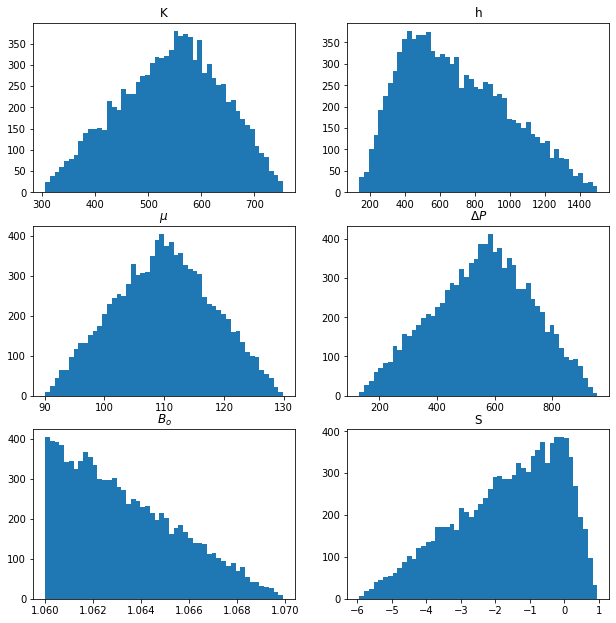

In [157]:
%matplotlib inline

fig,ax=plt.subplots(3,2,figsize=(8,4))

plt.subplots_adjust(left=3,right=4,top=6,bottom=4)

ax[0,0].set_title("K")
ax[0,0].hist(K,bins=50)

ax[1,0].set_title("$ \mu $")
ax[1,0].hist(mu,bins=50)

ax[2,0].set_title("$ B_o $")
ax[2,0].hist(Bo,bins=50)

ax[0,1].set_title("h")
ax[0,1].hist(T,bins=50)

ax[1,1].set_title("$ \Delta P $")
ax[1,1].hist(dP,bins=50)

ax[2,1].set_title("S")
ax[2,1].hist(S,bins=50)


plt.show()

### Distribucion del resultado

[]

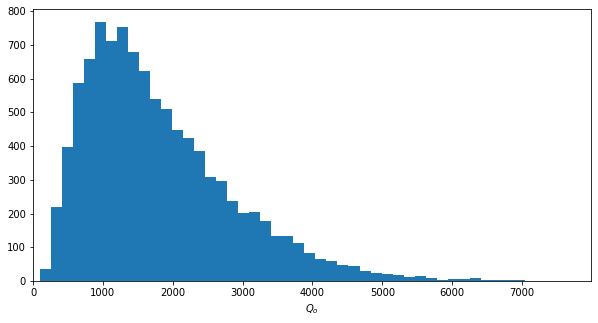

In [102]:
fig=plt.figure(figsize=(10,5))
plt.hist(Q,bins=50)
plt.xlabel("$Q_o$")
plt.xlim(0,7988)

plt.plot()

[]

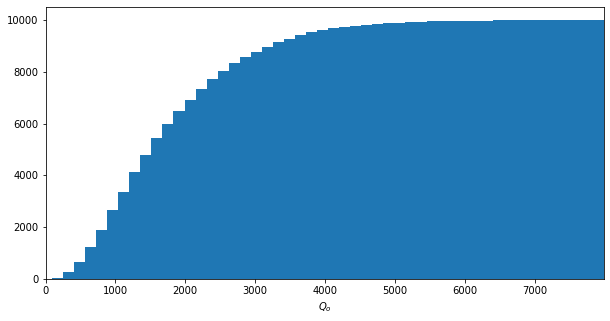

In [97]:
fig=plt.figure(figsize=(10,5))
plt.hist(Q,bins=50,cumulative=True)
plt.xlim(0,7988)
plt.xlabel("$Q_o$")
plt.plot()

### Construccion de DataFrame

In [126]:
DF = pd.DataFrame()
DF["Permeabilidad"] = K
DF["Viscosidad"] = mu 
DF["F.Volumetrico"] = Bo 
DF["Daño"] = S
DF["dif.Presion"] = dP
DF["Grosor"] = h
DF["Gasto"] = Q

### Descripcion estadistica de variables

In [128]:
DF.describe()

,Permeabilidad,Viscosidad,F.Volumetrico,Daño,dif.Presion,Grosor,Gasto
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,541.951713,109.945505,1.063280,-1.653293,556.979904,687.212212,1800.271803
std,96.069540,8.154427,0.002335,1.535191,169.888055,296.166525,1059.969832
min,305.922575,90.077115,1.060000,-5.945427,129.938707,143.945326,94.409526
25%,472.865522,104.041544,1.061329,-2.730188,437.593653,447.225205,1005.730415
50%,548.243136,109.984638,1.062860,-1.415980,565.132089,644.577642,1560.034423
75%,612.742641,115.786087,1.064913,-0.371420,679.005069,894.998191,2364.833995
max,754.224863,129.915139,1.069907,0.956131,956.589865,1506.872394,7988.463311


### Adicional : Boxplot para descripcion

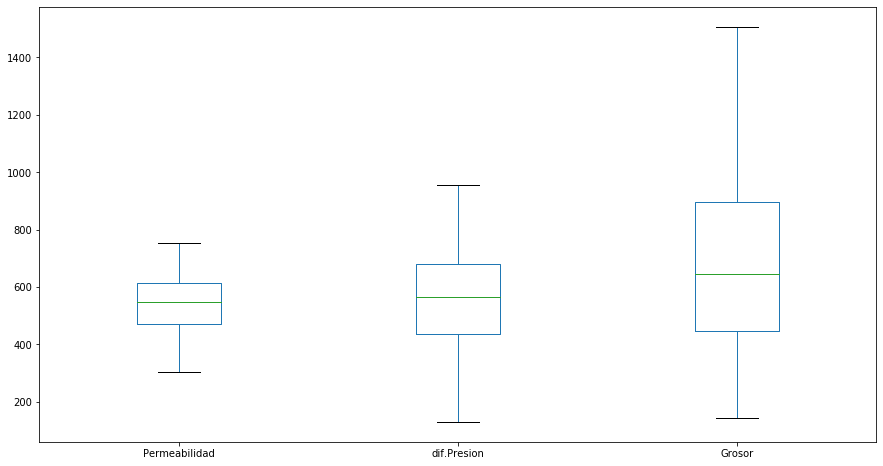

In [138]:
boxplot = DF.boxplot(figsize=(15,8),grid=False,column=['Permeabilidad', 'dif.Presion','Grosor'])

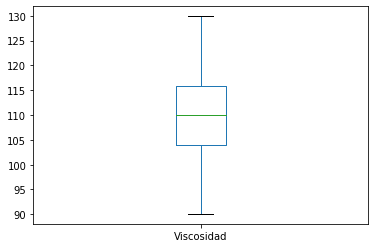

In [141]:
boxplot = DF.boxplot(grid=False,column=['Viscosidad'])

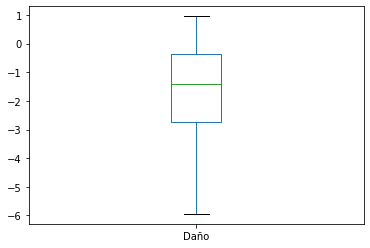

In [143]:
boxplot = DF.boxplot(grid=False,column=['Daño'])

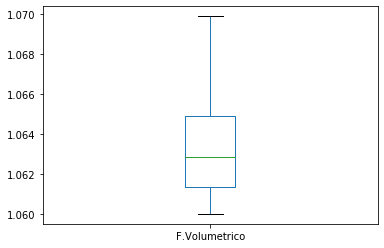

In [144]:
boxplot = DF.boxplot(grid=False,column=['F.Volumetrico'])